# 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data saved to etf_closing_prices.csv


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='Date', ylabel='Bonds'>

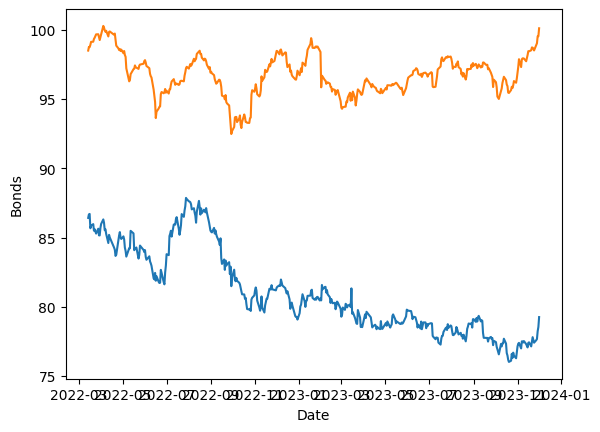

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ETFs
# ETF that tracks MSCI World Index
world_etf_ticker = 'MAJGO.CO'  # iShares MSCI World ETF

# ETF that tracks a bond index
bond_etf_ticker = 'IS0X.DE'  # iShares Core U.S. Aggregate Bond ETF

# Download historical data
world_etf_data = yf.download(world_etf_ticker, start="1950-01-01")
bond_etf_data = yf.download(bond_etf_ticker, start="1950-01-01")

# Extract closing prices
world_etf_close = world_etf_data['Close']
bond_etf_close = bond_etf_data['Close']

# Combine data into a single DataFrame
combined_data = pd.DataFrame({
    'Stocks': world_etf_close,
    'Bonds': bond_etf_close
})

# Drop rows with NaN values
combined_data.dropna(inplace=True)

# Save to CSV
csv_file_path = 'etf_closing_prices.csv'
combined_data.to_csv(csv_file_path)

print(f"Data saved to {csv_file_path}")
sns.lineplot(data=combined_data, x='Date', y='Bonds')
sns.lineplot(data=combined_data, x='Date', y='Stocks')

In [40]:
combined_data = np.log(combined_data)
df = combined_data.diff()
df

csv_file_path = '3start_data_log_diff.csv'
df.to_csv(csv_file_path)

print(f"Data saved to {csv_file_path}")

Data saved to 3start_data_log_diff.csv


In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# Assuming your data is loaded into a DataFrame named 'data'
# For example, data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Filling any missing values if necessary
data = df.iloc[1:]

# Define a function to fit VAR model and perform tests
def fit_var_and_test(data, maxlags):
    results = {}
    for lag in range(0, maxlags + 1):
        model = VAR(data)
        result = model.fit(lag)
        results[lag] = result

        # Print Summary for each lag
        #print(f"\nSummary for VAR model with {lag} lags:")
        #print(result.summary())

    # Perform Likelihood Ratio Test and print results
    print("\nLikelihood Ratio Test Results:")
    for lag in range(0, maxlags):
        lrtest = results[lag+1].test_causality('Stocks', 'Bonds', kind='f')
        print(f"Lag {lag} vs Lag {lag+1}: p-value = {lrtest.pvalue}")

    return results

# Fit the VAR models and test
max_lags = 
var_results = fit_var_and_test(data, max_lags)


/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


Likelihood Ratio Test Results:
Lag 0 vs Lag 1: p-value = 0.11622919597759525
Lag 1 vs Lag 2: p-value = 0.07274087167108896
Lag 2 vs Lag 3: p-value = 0.10440193979023886
Lag 3 vs Lag 4: p-value = 0.0747147764363113
Lag 4 vs Lag 5: p-value = 0.1087193710374474
Lag 5 vs Lag 6: p-value = 0.050339416577187705
Lag 6 vs Lag 7: p-value = 0.08391774611458097
Lag 7 vs Lag 8: p-value = 0.11689540357063993
Lag 8 vs Lag 9: p-value = 0.14282419111005284
Lag 9 vs Lag 10: p-value = 0.20646141069024235
Lag 10 vs Lag 11: p-value = 0.21680467707767778
Lag 11 vs Lag 12: p-value = 0.27263523574518983
Lag 12 vs Lag 13: p-value = 0.3329479285356142
Lag 13 vs Lag 14: p-value = 0.23171465851009226
Lag 14 vs Lag 15: p-value = 0.2764748257506767
Lag 15 vs Lag 16: p-value = 0.33775949112921616
Lag 16 vs Lag 17: p-value = 0.22650972981260659
Lag 17 vs Lag 18: p-value = 0.3086523551509037
Lag 18 vs Lag 19: p-value = 0.2864692327823738
Lag 19 vs Lag 20: p-value = 0.16541084658198799
Lag 20 vs Lag 21: p-value = 0.20

In [30]:
model = VAR(data)
result = model.fit(1)


# Print Summary for each lag
print(f"\nSummary for VAR model with {1} lags:")
print(result.summary())


Summary for VAR model with 1 lags:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Nov, 2023
Time:                     15:24:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.7050
Nobs:                     2836.00    HQIC:                  -16.7130
Log likelihood:           15663.3    FPE:                5.49101e-08
AIC:                     -16.7176    Det(Omega_mle):     5.47941e-08
--------------------------------------------------------------------
Results for equation Stocks
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000439         0.000187            2.345           0.019
L1.Stocks        -0.039398         0.018808           -2.095           0.036
L1.Bonds          0.003193         0.00

/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/august/.venvs/jupyter/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipykernel_9013/2022599406.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


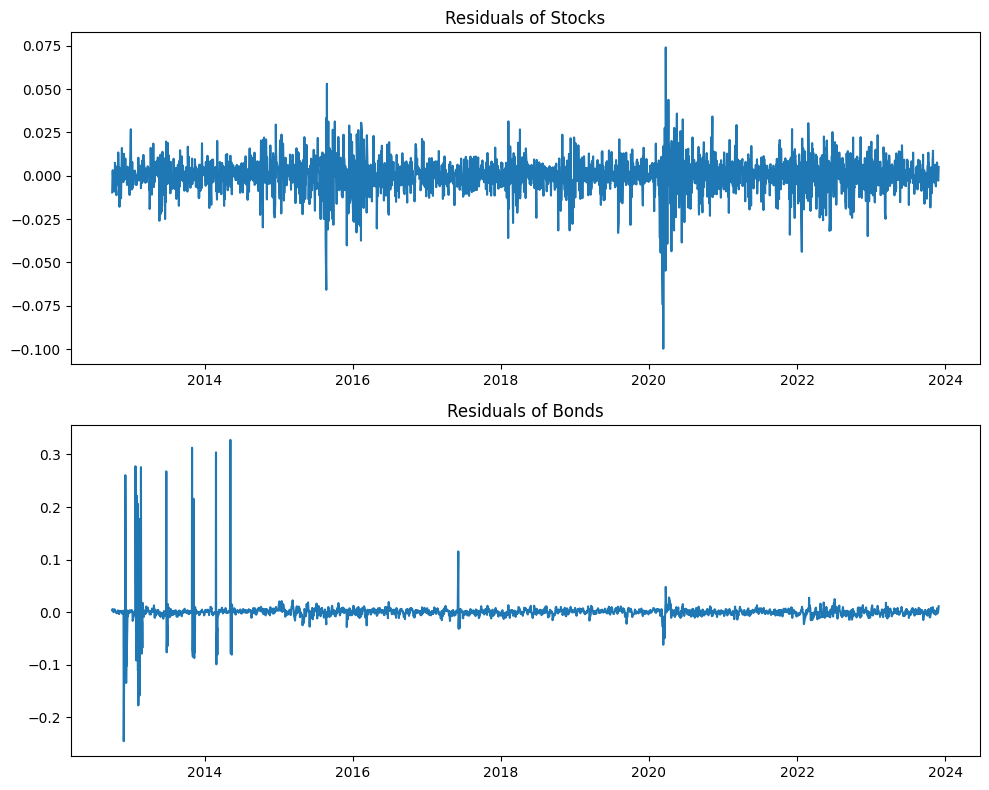

In [33]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your time series
# For example, data = pd.read_csv('your_data.csv')

# Fit the VAR model
model = VAR(data)
model_fitted = model.fit(5) # Assuming 5 lags; adjust based on your model selection

# Extract residuals
residuals = model_fitted.resid

# Plot residuals
plt.figure(figsize=(10,8))
for i, column in enumerate(residuals.columns):
    plt.subplot(len(residuals.columns), 1, i + 1)
    plt.plot(residuals[column])
    plt.title(f"Residuals of {column}")
    plt.tight_layout()
plt.show()


/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/august/.venvs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='Date', ylabel='Bonds'>

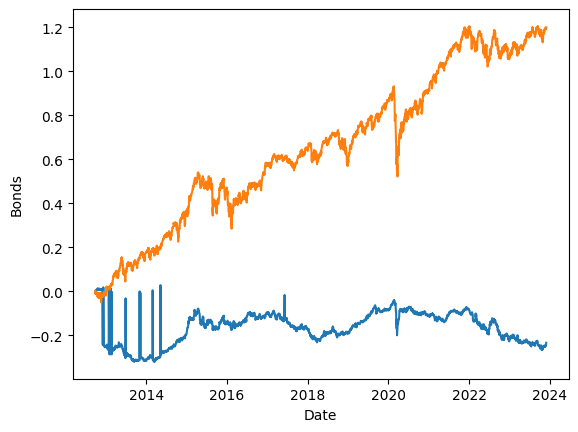

In [36]:
new = np.cumsum(data)
new
import seaborn as sns
sns.lineplot(data=new, x='Date', y='Bonds')
sns.lineplot(data=new, x='Date', y='Stocks')

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
import matplotlib.pyplot as plt
max_lag = 1
# Load your CSV file
file_path = '2start_data_log_diff.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)
# print(df)
# Select the column with your time series data
# Replace 'your_column_name' with the name of the column you want to analyze
time_series = df['Stocks']
# Define a function to fit the Markov switching AR model with different lags
def fit_markov_ar(time_series, max_lag):
    results = {}
    for lag in range(max_lag + 1):
        model = MarkovAutoregression(time_series, k_regimes=2, order=lag, switching_ar=False)
        fit = model.fit(disp=False)
        results[lag] = fit
    return results

# Fit the models with up to 5 lags
model_results = fit_markov_ar(time_series, 5)

# Perform likelihood ratio tests and choose the best model
best_lag = 0
best_model = model_results[0]
for lag in range(0, 6):
    lr_test = model_results[lag].likelihood_ratio_test(model_results[lag - 1])
    p_value = lr_test[1]
    if p_value < 0.05:  # Using 5% significance level
        best_lag = lag
        best_model = model_results[lag]
    else:
        break

# Plotting the output
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(best_model.fittedvalues, label='Fitted', color='red')
plt.title(f'Markov Switching AR Model (Lag: {best_lag})')
plt.legend()
plt.show()


LinAlgError: SVD did not converge

In [11]:
model = MarkovAutoregression(time_series, k_regimes=2, order=5, switching_ar=False)
fit = model.fit(disp=False)
results[lag] = fit

LinAlgError: SVD did not converge